# Visualisasi Data Dengan Matplotlib

##### Mela Amelia

### 1. Pengenalan Dataset 

In [11]:
 #import library pandas untuk membaca file csv (comma separated value)
import pandas as pd

#import dataset csv dari API dqlab
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

#Tampilkan ukuran data
print('Ukuran dataset')
print('%d baris dan %d kolom\n' %dataset.shape)

#Tampilkan 10 data teratas
print('Sepuluh data teratas:')
dataset.head(10)

Ukuran dataset
5000 baris dan 9 kolom

Sepuluh data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000


In [12]:
#Menampilkan info dari dataset (nama kolom, banyak row null-non null, tipe data)
print('Info dataset')
dataset.info()

#Penjelasan Dataset - Detail Kolom
#1. order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
#2. order_date : tanggal terjadinya transaksi
#3. customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
#4. city : kota tempat toko terjadinya transaksi
#5. province : provinsi (berdasarkan city)
#6. product_id : ID dari suatu product yang dibeli
#7. brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
#8. quantity : Kuantitas / banyaknya product yang dibeli
#9. item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
order_id       5000 non-null int64
order_date     5000 non-null object
customer_id    5000 non-null int64
city           5000 non-null object
province       5000 non-null object
product_id     5000 non-null object
brand          5000 non-null object
quantity       5000 non-null int64
item_price     5000 non-null int64
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


### 2. Penambahan Kolom Order Month pada Dataset

In [13]:
#import library datetime
import datetime

#Untuk mendapatkan bulan dan tahun pada kolom order_date (string/object -> datetime)
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x,
"%Y-%m-%d").strftime('%Y-%m'))

#Tampilkan 5 hasil teratas 
print("Data Retail Raw dengan Order Month\n")
dataset.head(10)

Data Retail Raw dengan Order Month



,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000,2019-07
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000,2019-09
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000,2019-11


### 3. Penambahan Kolom GMV (Gross Merchandise Value) pada Dataset

In [14]:
#GMV = harga barang * kuantitas
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

#Tampilkan ukuran data
print('Ukuran dataset')
print('%d baris dan %d kolom\n' %dataset.shape)

#Tampilkan 5 data teratas
print('Lima data teratas:')
dataset.head(10)

Ukuran dataset
5000 baris dan 11 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000,2019-07,2080000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000,2019-09,410000
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000,2019-11,298000


### 4. Membuat Data Agregat Berdasarkan Bulan Tanggal Terjadinya Transaksi (order_month)

In [15]:
#Lakukan penjumlahan kolom 'gmv' lalu kelompokkan berdasarkan kolom order_month
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()

#Tampilkan hasil
print('Sum `GMV` Grouping By order_month')
monthly_amount

Sum `GMV` Grouping By order_month


,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


### 5. Membuat Line Chart Trend Pertumbuhan GMV

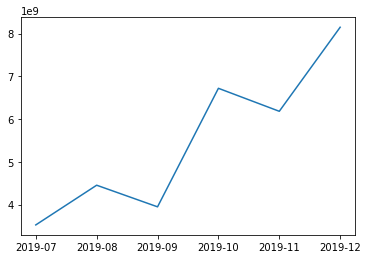

0    2019-07
1    2019-08
2    2019-09
3    2019-10
4    2019-11
5    2019-12
Name: order_month, dtype: object

In [16]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Definisikan nilai x = monthly_amount['order_month'] dan y = monthly_amount['gmv']
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])

#Tampilkan grafik
plt.show()
monthly_amount['order_month']

### 6. Cara Alternatif: Fungsi .plot pada Pandas Dataframe

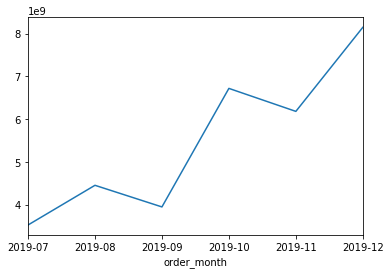

In [17]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Tampilkan hasil
plt.show()

### 7. Mengubah Figsize

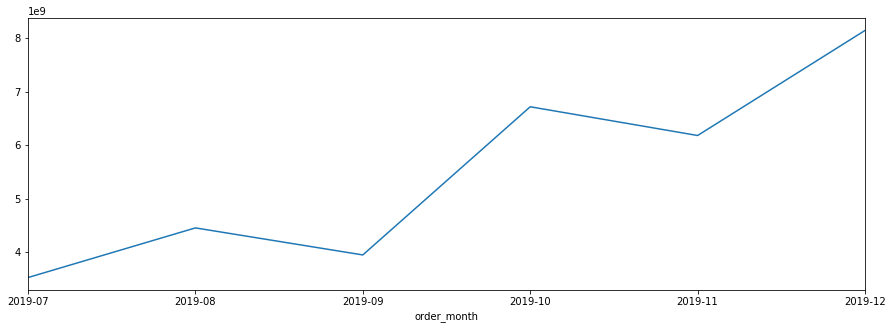

In [18]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure
plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Tampilkan hasil
plt.show()

### 8. Menambahkan Title dan Axis Labels

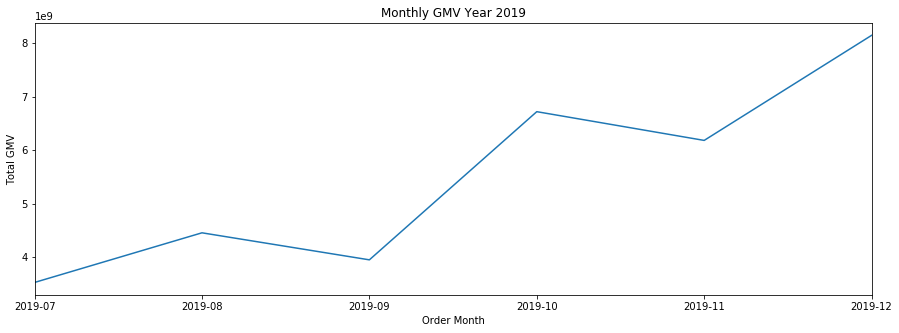

In [19]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure (panjang x lebar)
plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month')

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total GMV')

#Tampilkan hasil
plt.show()

### 9. Kustomisasi Title dan Axis Label

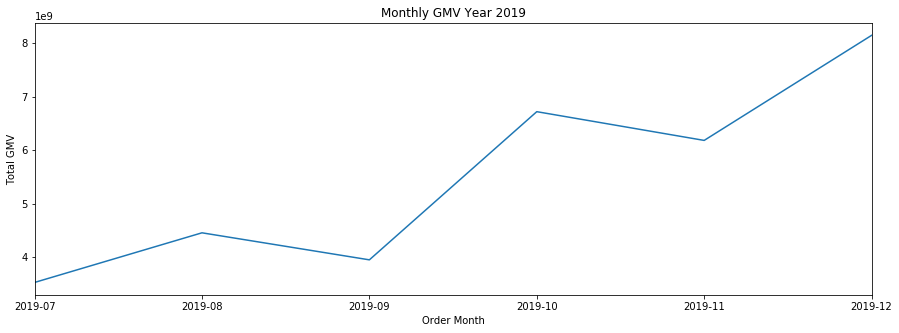

In [20]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure (panjang x lebar)
plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot
dataset.groupby(['order_month'])['gmv'].sum().plot()

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month')

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total GMV')

#Tampilkan hasil
plt.show()

### 10. Kustomisasi Grafik Plot

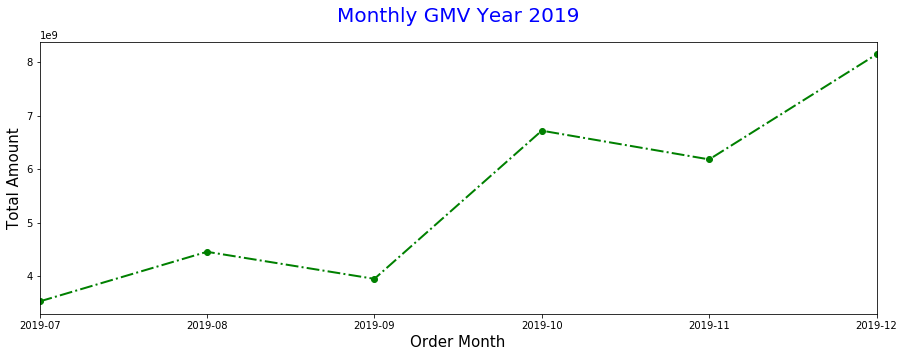

In [24]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure (panjang x lebar)
plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot dengan warna hijau, penanda titik = 'o', ketebalan = 2 dan garis -.
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.'
, linewidth=2)

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month', fontsize=15)

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total Amount', fontsize=15)

#Tampilkan hasil
plt.show()

### 11. Kustomisasi Axis Ticks

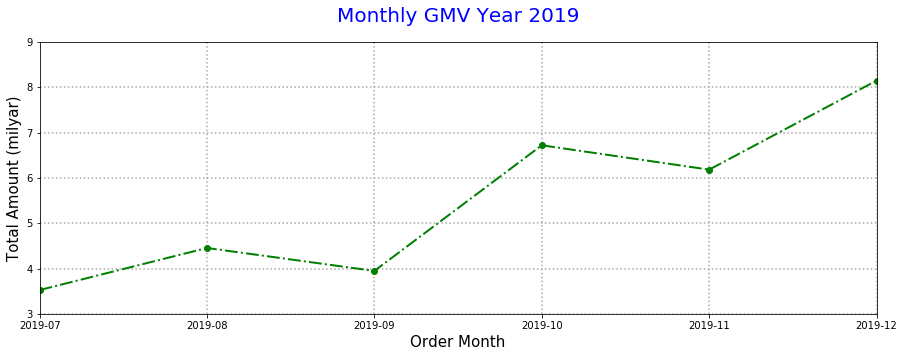

In [25]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure (panjang x lebar)
plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot dengan warna hijau, penanda titik = 'o', ketebalan = 2 dan garis -.
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.'
, linewidth=2)

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month', fontsize=15)

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total Amount (milyar)', fontsize=15)

#Tambahkan grid (garis bantu bayangan) dengan ketebalan 1.5 dan tipe garis = :
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)

#Dapatkan nilai y (variabel labels) dan ticklabel object (locations)
labels, locations = plt.yticks()

#Ubah nilai y menjadi lebih sederhana dengan membagi nilai y dengan 10^9 --> ubah tipe datanya menjadi int
plt.yticks(labels, (labels/1000000000).astype(int))

#Tampilkan hasil
plt.show()

### 13. Menentukan Batas Minimum dan Maksimum Axis Ticks

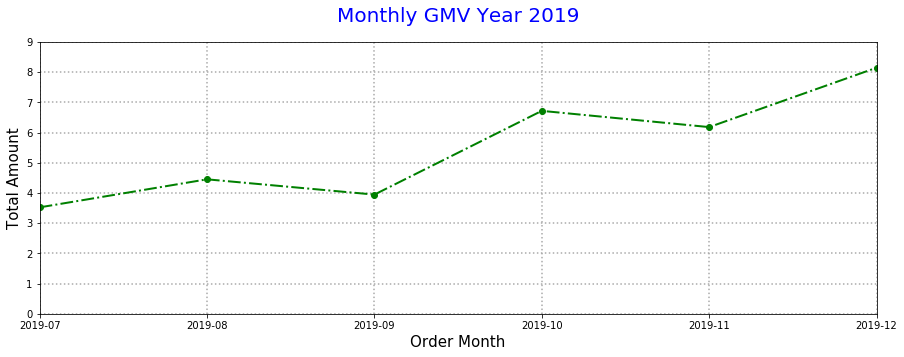

In [27]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure (panjang x lebar)
plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot dengan warna hijau, penanda titik = 'o', ketebalan = 2 dan garis -.
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.'
, linewidth=2)

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month', fontsize=15)

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total Amount', fontsize=15)

#Tambahkan grid (garis bantu bayangan) dengan ketebalan 1.5 dan tipe garis = :
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)

#Seting plot grafik dengan nilai minimum pada y sebesar 0 
plt.ylim(ymin=0)

#Dapatkan nilai y (variabel labels) dan ticklabel object (locations)
labels, locations = plt.yticks()

#Ubah nilai y menjadi lebih sederhana dengan membagi nilai y dengan 10^9 --> ubah tipe datanya menjadi int
plt.yticks(labels, (labels/1000000000).astype(int))

#Tampilkan hasil
plt.show()

### 14. Menambahkan Informasi pada Plot

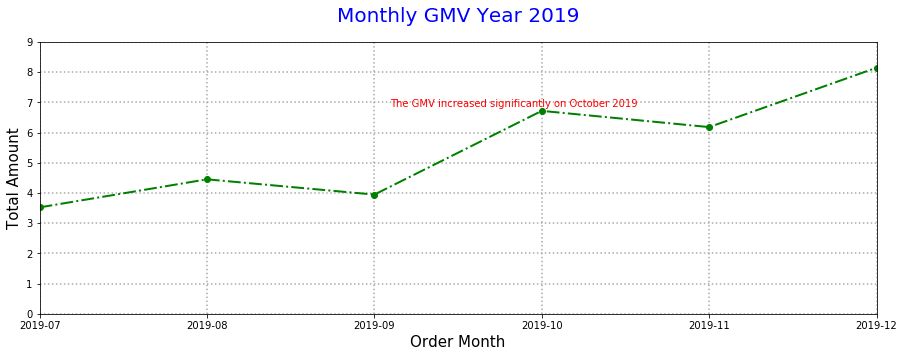

In [29]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure (panjang x lebar)
fig = plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot dengan warna hijau, penanda titik = 'o', ketebalan = 2 dan garis -.
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.'
, linewidth=2)

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month', fontsize=15)

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total Amount', fontsize=15)

#Tambahkan grid (garis bantu bayangan) dengan ketebalan 1.5 dan tipe garis = :
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)

#Seting plot grafik dengan nilai minimum pada y sebesar 0 
plt.ylim(ymin=0)

#Dapatkan nilai y (variabel labels) dan ticklabel object (locations)
labels, locations = plt.yticks()

#Ubah nilai y menjadi lebih sederhana dengan membagi nilai y dengan 10^9 --> ubah tipedatanya menjadi int
plt.yticks(labels, (labels/1000000000).astype(int))

#Berikan text pada grafik berupa text penjelasan
plt.text(0.45,0.70, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

#Tampilkan hasil
plt.show()

### 16. Pengaturan Parameter untuk Menyimpan Gambar

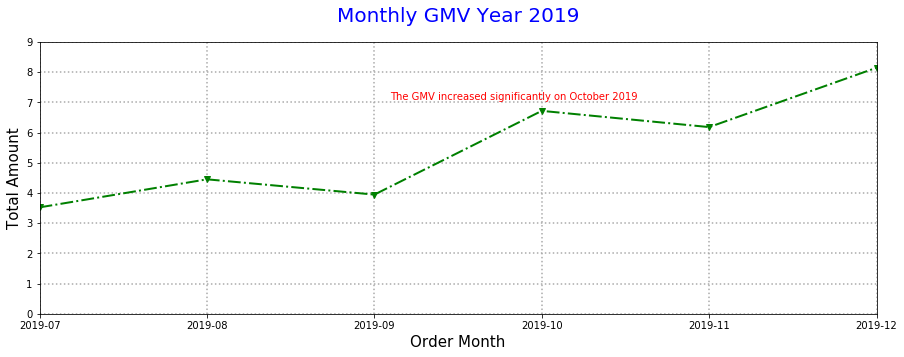

In [30]:
#import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#Ubah ukuran figure (panjang x lebar)
fig = plt.figure(figsize=(15,5))

#Lakukan agregasi (sum gmv grouping by order_month) lalu plot dengan warna hijau, penanda titik = 'o', ketebalan = 2 dan garis -.
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='v', linestyle='-.'
, linewidth=2)

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month', fontsize=15)

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total Amount', fontsize=15)

#Tambahkan grid (garis bantu bayangan) dengan ketebalan 1.5 dan tipe garis = :
plt.grid(color='darkgray', linestyle=':', linewidth=1.5)

#Seting plot grafik dengan nilai minimum pada y sebesar 0 
plt.ylim(ymin=0)

#Dapatkan nilai y (variabel labels) dan ticklabel object (locations)
labels, locations = plt.yticks()

#Ubah nilai y menjadi lebih sederhana dengan membagi nilai y dengan 10^9 --> ubah tipedatanya menjadi int
plt.yticks(labels, (labels/1000000000).astype(int))

#Berikan text pada grafik berupa text penjelasan
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

#save grafik dengan format png dan kualitas 95 (pada colab path default : /content/monthly_gmv.png)

plt.savefig('monthly_gmv.jpg', quality=95)

#Tampilkan hasil
plt.show()

### Mini Project: Daily Number of Customers on Desember

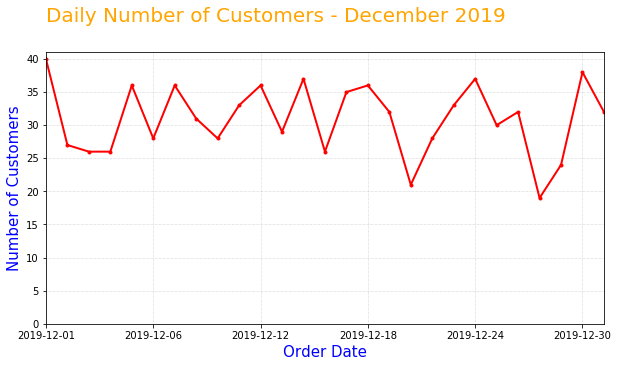

In [33]:
 # Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x,
"%Y-%m-%d").strftime('%Y-%m'))

# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', pad=30, loc='left', fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()